In [1]:
%matplotlib widget

import pandas as pd
from tqdm import tqdm
import traceback

import hydra
from hydra.utils import instantiate
from omegaconf import DictConfig

from pathlib import Path
from typing import Any, Dict, List
from dataclasses import asdict
from datetime import datetime
import logging

import cv2
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib import rcParams
from matplotlib.axes import Axes
from pyquaternion import Quaternion
from tqdm import tqdm


import mediapy
import sys

sys.path.append('/home/hujiangtao/github/zt/navsim_workspace/nuplan-devkit')
from navsim.common.dataloader import MetricCacheLoader
from navsim.common.dataloader import SceneLoader
from navsim.common.dataclasses import SceneFilter
from navsim.common.dataclasses import SensorConfig
from navsim.planning.scenario_builder.navsim_scenario import NavSimScenario




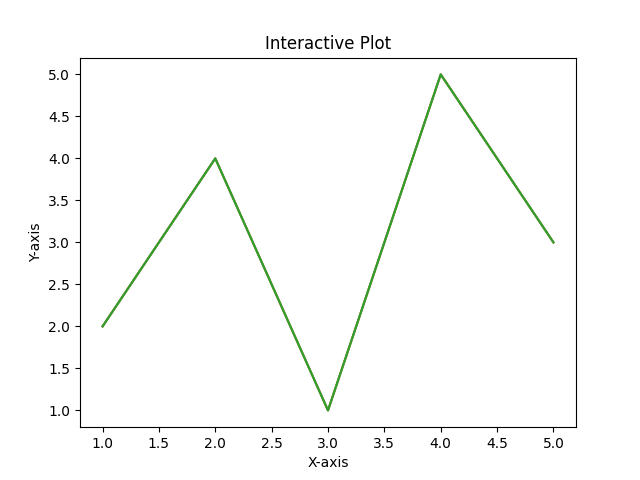

In [3]:
%matplotlib widget
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 5, 3]

plt.plot(x, y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Interactive Plot')
plt.show()

In [2]:
import sys
print(sys.path)

# change kernel to use navsim kernel for conda env
# the expected python version: 3.9.19
print('python version:', sys.version)


['/home/hujiangtao/github/zt/navsim_workspace/navsim/visualization', '/home/hujiangtao/github/zt/navsim_workspace/navsim/visualization', '/home/hujiangtao/github/zt/navsim_workspace/navsim', '/home/hujiangtao/github/zt/navsim_workspace/nuplan-devkit', '/home/hujiangtao/miniconda3/envs/navsim/lib/python39.zip', '/home/hujiangtao/miniconda3/envs/navsim/lib/python3.9', '/home/hujiangtao/miniconda3/envs/navsim/lib/python3.9/lib-dynload', '', '/home/hujiangtao/miniconda3/envs/navsim/lib/python3.9/site-packages', '/home/hujiangtao/github/zt/navsim_workspace/nuplan-devkit']
python version: 3.9.19 | packaged by conda-forge | (main, Mar 20 2024, 12:50:21) 
[GCC 12.3.0]


In [3]:
data_path = Path('/home/hujiangtao/github/zt/navsim_workspace/dataset/navsim_logs/mini')
print(data_path)
sensor_blobs_path = Path('/home/hujiangtao/github/zt/navsim_workspace/dataset/sensor_blobs/mini')
scene_filter = SceneFilter()
scene_loader = SceneLoader(
    sensor_blobs_path=sensor_blobs_path,
    data_path=data_path,
    scene_filter=scene_filter,
#    sensor_config=SensorConfig.build_no_sensors(),
    sensor_config=SensorConfig.build_all_sensors(),
)



/home/hujiangtao/github/zt/navsim_workspace/dataset/navsim_logs/mini


Loading logs: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 64/64 [00:02<00:00, 31.00it/s]


In [4]:
metric_cache_path = Path('/home/hujiangtao/github/zt/navsim_workspace/exp/metric_cache')

metric_cache_loader = MetricCacheLoader(metric_cache_path)
token='28d60c4ce7af52cb'

metric_cache = metric_cache_loader.get_from_token(token)
print(metric_cache)

MetricCache(file_path=PosixPath('/home/hujiangtao/github/zt/navsim_workspace/exp/metric_cache/2021.10.11.02.57.41_veh-50_01522_02088/unknown/28d60c4ce7af52cb/metric_cache.pkl'), trajectory=<nuplan.planning.simulation.trajectory.interpolated_trajectory.InterpolatedTrajectory object at 0x7801d7a28940>, ego_state=<nuplan.common.actor_state.ego_state.EgoState object at 0x7801d7a28970>, observation=<navsim.planning.simulation.planner.pdm_planner.observation.pdm_observation.PDMObservation object at 0x7801d7a28c70>, centerline=<navsim.planning.simulation.planner.pdm_planner.utils.pdm_path.PDMPath object at 0x7801d5eb3550>, route_lane_ids=['52899', '49286', '49425', '52185', '52429', '53509', '48688', '52998', '52211', '53784', '51953', '51877', '51887', '51922', '51967', '52973', '49345', '49629', '52379', '53557', '49025', '48567', '48568', '52366', '52474', '53529', '53741', '53851', '52104', '52212', '52331', '53830', '48898', '49333', '52230', '52532'], drivable_area_map=<navsim.planning.

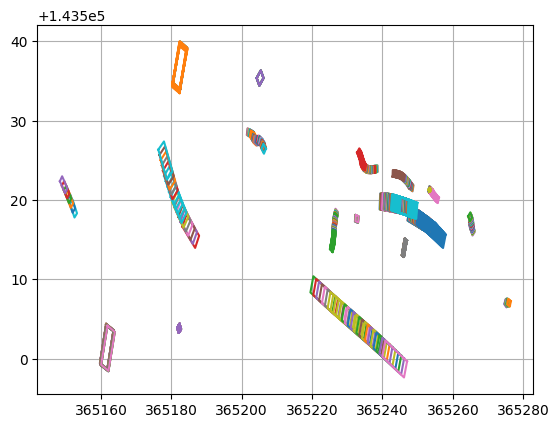

In [34]:
# agents
plt.figure()

for m in metric_cache.observation._occupancy_maps:
    for p in m._geometries:
        x, y = p.exterior.coords.xy
        plt.plot(x, y)
plt.grid(True)
plt.show()


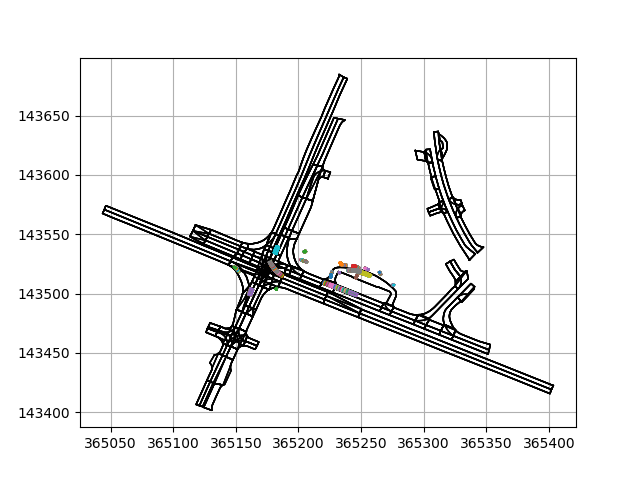

In [7]:
# static map
# plt.figure()

for p in metric_cache.drivable_area_map._geometries:
    x, y = p.exterior.coords.xy
    plt.plot(x, y, color='black', linewidth=1)

for m in metric_cache.observation._occupancy_maps:
    for p in m._geometries:
        x, y = p.exterior.coords.xy
        plt.plot(x, y)
    
plt.grid(True)
# plt.ion()
plt.show()




In [39]:
print(metric_cache.drivable_area_map._geometries)
# print(metric_cache.observation._map_radius) # 100m
# print(metric_cache.observation._sample_interval) # 0.1m
# print(metric_cache.observation._observation_samples) # 50
# print(metric_cache.observation._occupancy_maps[0]._tokens) 

# print(metric_cache.observation._occupancy_maps[0]._geometries) # <POLYGON ((365244.106 143520.461, 365239.337 143520.822, 365239.185 143518.8...>

#time_us,rear_axle.x,rear_axle.y,rear_axle.heading,
#  rear_axle_velocity_2d.x,rear_axle_velocity_2d.y,
#  rear_axle_acceleration_2d.x,rear_axle_acceleration_2d.y,
#  tire_steering_angle,
# print(*metric_cache.ego_state) # 1633922828900332 365227.26280433784 143515.02265918007 1.0060048234855166 1.4515518 0.0053056143 -0.117330424 -0.08830901 0.0



[<POLYGON ((365177.281 143539.623, 365180.081 143538.265, 365179.318 143536.3...>, <POLYGON ((365171.595 143505.464, 365176.656 143503.354, 365175.371 143502.5...>, <POLYGON ((365193.726 143518.917, 365192.507 143515.569, 365189.498 143517.0...>, <POLYGON ((365145.849 143527.233, 365144.039 143524.063, 365142.79 143524.69...>, <POLYGON ((365166.945 143456.009, 365157.64 143459.932, 365155.849 143456.01...>, <POLYGON ((365155.477 143500.222, 365160.22 143505.552, 365160.332 143507.34...>, <POLYGON ((365221.202 143511.929, 365229.937 143508.777, 365229.511 143509.7...>, <POLYGON ((365336.525 143528.199, 365341.311 143533.436, 365340.249 143534.1...>, <POLYGON ((365139.78 143422.928, 365132.98 143424.312, 365132.55 143423.404,...>, <POLYGON ((365330.615 143575.748, 365329.539 143578.936, 365328.431 143578.7...>, <POLYGON ((365293.12 143477.232, 365291.851 143474.025, 365289.278 143475.11...>, <POLYGON ((365223.514 143596.818, 365225.538 143602.388, 365222.772 143603.0...>, <POLYGON ((3652

found token: 28d60c4ce7af52cb
frame num: 14
scene meta: SceneMetadata(log_name='2021.10.11.02.57.41_veh-50_01522_02088', scene_token='900c6446007855de', map_name='sg-one-north', initial_token='28d60c4ce7af52cb', num_history_frames=4, num_future_frames=10)


/tmp/ipykernel_8094/3277734908.py:8: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)


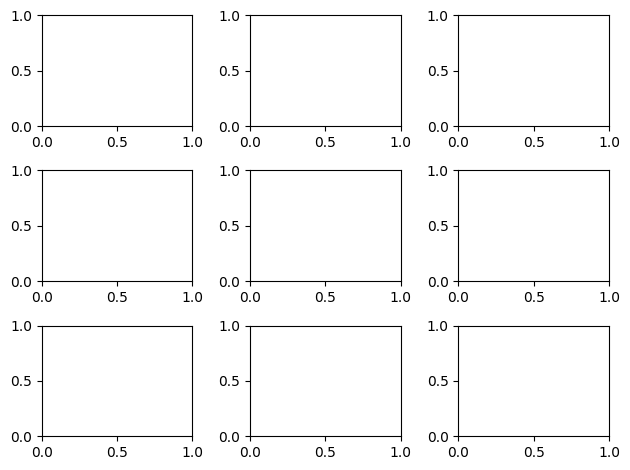

In [4]:
def img_from_fig(fig: matplotlib.figure.Figure) -> np.ndarray:
  """Returns a [H, W, 3] uint8 np image from fig.canvas.tostring_rgb()."""
  # Just enough margin in the figure to display xticks and yticks.
  fig.subplots_adjust(
      left=0.08, bottom=0.08, right=0.98, top=0.98, wspace=0.0, hspace=0.0
  )
  fig.canvas.draw()
  data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
  img = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
  plt.close(fig)
  return img

# display one scene 
token='28d60c4ce7af52cb'
scene = scene_loader.get_scene_from_token(token)

# fig, axes = plt.subplots(3, 3, figsize=(16, 24))
fig, axes = plt.subplots(3, 3) # , figsize=(16, 24))

print('found token:', token)
print('frame num:', len(scene.frames))
print('scene meta:', scene.scene_metadata)
imgs = []
for f in scene.frames:
    # timestamp: in microsecond unit
    # time_interval: 0.5s
    # print(f'frame token:{f.token} timestamp:{f.timestamp}')
    # print(f.ego_status)
    # print(f'num of PC:{(f.lidar)}')
    # 8 camera
    # print(f'num of camera: {(f.cameras)}')
    # data = Image.open(data_path)
    
    fig, axes = plt.subplots(3, 3) # , figsize=(16, 24))
    
    ax = axes[0, 1]
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(f.cameras.cam_f0.image)
    ax = axes[0, 0]
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(f.cameras.cam_l0.image)
    ax = axes[1, 0]
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(f.cameras.cam_l1.image)
    ax = axes[2, 0]
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(f.cameras.cam_l2.image)
    ax = axes[0, 2]
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(f.cameras.cam_r0.image)
    ax = axes[1, 2]
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(f.cameras.cam_r1.image)
    ax = axes[2, 2]
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(f.cameras.cam_r2.image)
    ax = axes[2, 1]
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(f.cameras.cam_b0.image)
    ax = axes[1, 1]
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    imgs.append(img_from_fig(fig))
    

plt.tight_layout()
plt.show()
mediapy.show_video(imgs, fps=1)


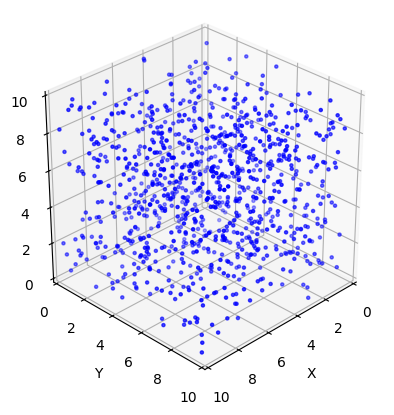

In [64]:
# Sample LiDAR point cloud data (x, y, z)
lidar_points = np.random.rand(1000, 3) * 10  # Random points in a 10x10x10 cube

# Initialize figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot LiDAR points
ax.scatter(lidar_points[:, 0], lidar_points[:, 1], lidar_points[:, 2], c='b', marker='.')

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set axis limits
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_zlim([0, 10])

# Set aspect ratio to equal
ax.set_box_aspect([1,1,1])

# Set view angle
ax.view_init(elev=30, azim=45)


found token: 28d60c4ce7af52cb
frame num: 14
scene meta: SceneMetadata(log_name='2021.10.11.02.57.41_veh-50_01522_02088', scene_token='900c6446007855de', map_name='sg-one-north', initial_token='28d60c4ce7af52cb', num_history_frames=4, num_future_frames=10)
frame token:87fdbcdc68155216 timestamp:1633922827399684
EgoStatus(ego_pose=array([3.65226073e+05, 1.43513269e+05, 9.22074632e-01]), ego_velocity=array([ 1.357392  , -0.00624677], dtype=float32), ego_acceleration=array([0.31731483, 0.24350421], dtype=float32), driving_command=array([0, 0, 1, 0]), in_global_frame=True)
[3 3 3 ... 5 5 5]
[9 9 9 ... 3 3 3]


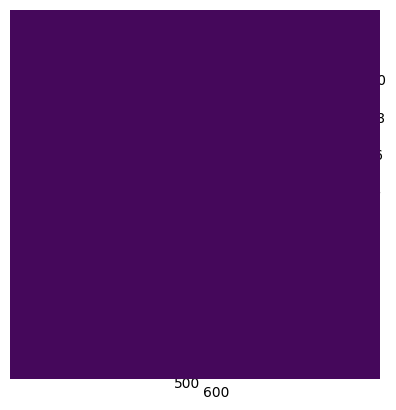

In [28]:

import open3d as o3d

# Load the PCD file
# pcd = o3d.io.read_point_cloud("path/to/your/pointcloud.pcd")

# pcl_viewer 87fdbcdc68155216.pcd

# display one scene 
token='28d60c4ce7af52cb'
scene = scene_loader.get_scene_from_token(token)

print('found token:', token)
print('frame num:', len(scene.frames))
print('scene meta:', scene.scene_metadata)
for f in scene.frames:
    # timestamp: in microsecond unit
    # time_interval: 0.5s
    print(f'frame token:{f.token} timestamp:{f.timestamp}')
    print(f.ego_status)
    # print(f'num of PC:{(f.lidar)}')
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    lidar_points = f.lidar.lidar_pc
    image = render_lidar_to_image(lidar_points, width=640, height=480)
    ax.imshow(image)

    # Visualize the point cloud
    # o3d.visualization.draw_geometries([lidar_points])

    # print(len(lidar_points))
    # Plot LiDAR points
#     ax.scatter(lidar_points[:, 0], lidar_points[:, 1], lidar_points[:, 2], c='b', marker='.')
    # ax.scatter(lidar_points[0, :], lidar_points[1, :], lidar_points[2,:], c='b', marker='.')

#     # Set axis labels
#     ax.set_xlabel('X')
#     ax.set_ylabel('Y')
#     ax.set_zlabel('Z')

#     # Set axis limits
# #     ax.set_xlim([0, 10])
# #     ax.set_ylim([0, 10])
# #     ax.set_zlim([0, 10])

#     # Set aspect ratio to equal
#     ax.set_box_aspect([1,1,1])

#     # Set view angle
#     ax.view_init(elev=90, azim=45)
    
    # break


In [27]:
import numpy as np

def render_lidar_to_image(points, width, height, min_value=-1.0, max_value=600.0):
  """
  Renders a LiDAR point cloud to a top-down image.

  Args:
      points: Nx3 numpy array containing LiDAR points (X, Y, Z).
      width: Image width.
      height: Image height.
      min_value: Minimum value for scaling (default: -1.0).
      max_value: Maximum value for scaling (default: 1.0).

  Returns:
      A numpy array representing the top-down image (height x width).
  """
  # Filter points based on Z-axis (assuming top-down view)
  # filtered_points = points[points[2, :] > 0]  # Keep points above ground
  filtered_points = points

  # Scale points to image coordinates
  X_scaled = (filtered_points[0, :] - min_value) / (max_value - min_value) * width
  Y_scaled = (filtered_points[1, :] - min_value) / (max_value - min_value) * height

  # Cast to integer for image indexing
  X_int = X_scaled.astype(np.int32)
  print(X_int)
  Y_int = Y_scaled.astype(np.int32)
  print(Y_int)    

  # Create empty image with intensity as value (can be modified for color)
  image = np.zeros((height, width))

  # Count occurrences of each point (intensity accumulation)
  np.add.at(image, (Y_int, X_int), 1)

  return image

# Example usage (assuming you have your point cloud data in a variable named 'points')
# image = render_lidar_to_image(points, width=640, height=480)

# You can now use this image array for further processing or visualization with libraries like OpenCV


In [44]:
NUPLAN_MAPS_ROOT = '/home/hujiangtao/github/zt/navsim_workspace/dataset/maps'
NUPLAN_MAP_VERSION = '1.0'

token='28d60c4ce7af52cb'
for token in scene_loader:
    # print('token:', token)
    try:
        scene = scene_loader.get_scene_from_token(token)
    except Exception as e:
        # print(f"An error occurred: {e}")
        continue

    print('found token:', token)
    print('frame num:', len(scene.frames))
    print('scene meta:', scene.scene_metadata)
    for f in scene.frames:
        # timestamp: in microsecond unit
        # time_interval: 0.5s
        print(f'frame token:{f.token} timestamp:{f.timestamp}')
        print(f.ego_status)
        print(f.lidar)
        print(f.cameras)
        break

#     scenario = NavSimScenario(
#          scene, map_root=NUPLAN_MAPS_ROOT, map_version=NUPLAN_MAP_VERSION
#     )
#     print(scenario.ego_vehicle_parameters)
    break


found token: 28d60c4ce7af52cb
frame num: 14
scene meta: SceneMetadata(log_name='2021.10.11.02.57.41_veh-50_01522_02088', scene_token='900c6446007855de', map_name='sg-one-north', initial_token='28d60c4ce7af52cb', num_history_frames=4, num_future_frames=10)
frame token:87fdbcdc68155216 timestamp:1633922827399684
EgoStatus(ego_pose=array([3.65226073e+05, 1.43513269e+05, 9.22074632e-01]), ego_velocity=array([ 1.357392  , -0.00624677], dtype=float32), ego_acceleration=array([0.31731483, 0.24350421], dtype=float32), driving_command=array([0, 0, 1, 0]), in_global_frame=True)
Lidar(lidar_pc=array([[ 2.0220602 ,  2.018685  ,  2.0146763 , ...,  4.2346706 ,
         4.2295575 ,  4.2318187 ],
       [11.147909  , 11.0215435 , 10.891131  , ...,  2.8360593 ,
         2.776515  ,  2.821721  ],
       [ 4.5664287 ,  4.0130105 ,  3.5341597 , ..., -0.17932382,
        -0.2248247 , -0.3296664 ],
       [52.        , 28.        , 28.        , ..., 73.        ,
        51.        , 40.        ],
       [39

In [ ]:
sensor_blobs_path = ''
data_path = 
scene_loader = SceneLoader(
        sensor_blobs_path=sensor_blobs_path,
        data_path=data_path,
        scene_filter=scene_filter,
        sensor_config=agent.get_sensor_config(),
    )
    metric_cache_loader = MetricCacheLoader(metric_cache_path)
    agent.initialize()

    # NOTE: This could be parallel
    score_rows: List[Dict[str, Any]] = []
    for token in tqdm(metric_cache_loader.tokens, desc="Compute PDM-Score"):
        score_row: Dict[str, Any] = {"token": token, "valid": True}

        try:
            agent_input = scene_loader.get_agent_input_from_token(token)
            metric_cache = metric_cache_loader.get_from_token(token)
            if agent.requires_scene:
                scene = scene_loader.get_scene_from_token(token)